In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

from fastai.vision import *
from fastai.metrics import error_rate

bs = 32

path_img = 'data'

In [4]:
images = ImageList.from_folder(path_img)
images

ImageList (1458 items)
Image (3, 474, 640),Image (3, 389, 744),Image (3, 900, 1600),Image (3, 260, 260),Image (3, 360, 640)
Path: data

/Users/e.gapon/.virtualenvs/pomodoro/lib/python3.9/site-packages/torch/nn/functional.py:3502: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn(
/Users/e.gapon/.virtualenvs/pomodoro/lib/python3.9/site-packages/torch/nn/functional.py:3502: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn(
/Users/e.gapon/.virtualenvs/pomodoro/lib/python3.9/site-packag

/Users/e.gapon/.virtualenvs/pomodoro/lib/python3.9/site-packages/torch/nn/functional.py:3502: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn(
/Users/e.gapon/.virtualenvs/pomodoro/lib/python3.9/site-packages/torch/nn/functional.py:3502: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn(
/Users/e.gapon/.virtualenvs/pomodoro/lib/python3.9/site-packag

/Users/e.gapon/.virtualenvs/pomodoro/lib/python3.9/site-packages/torch/nn/functional.py:3502: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn(
/Users/e.gapon/.virtualenvs/pomodoro/lib/python3.9/site-packages/torch/nn/functional.py:3502: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn(
/Users/e.gapon/.virtualenvs/pomodoro/lib/python3.9/site-packag

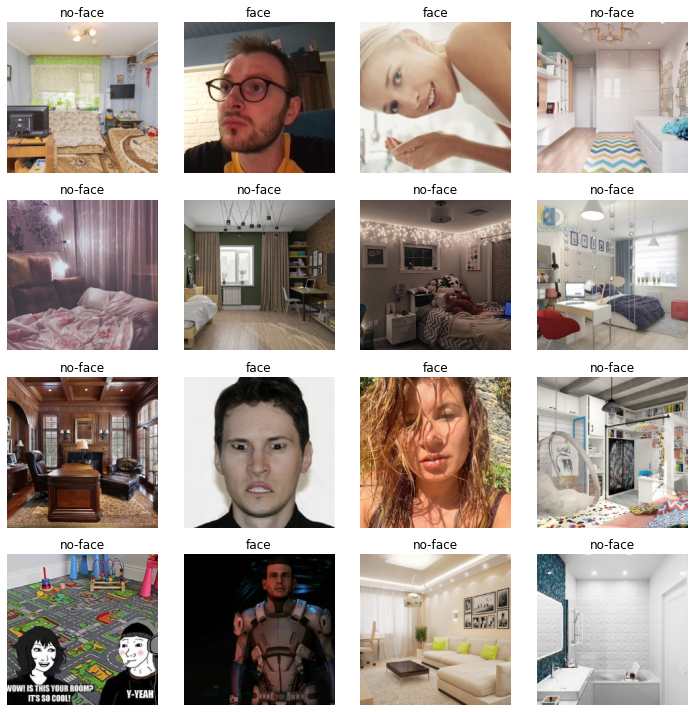

In [5]:
data = ImageDataBunch.from_folder(path_img, valid_pct=0.2, bs=bs, size=224).normalize(imagenet_stats)
data.show_batch(rows=4, figsize=(10,10))
#print(data.classes)

In [6]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


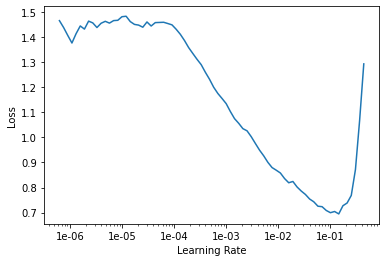

In [7]:
learn.lr_find()
learn.recorder.plot()

In [8]:
learn.fit_one_cycle(2, 1e-3)

epoch,train_loss,valid_loss,error_rate,time
0,0.443512,0.199183,0.024055,05:40
1,0.220156,0.161061,0.020619,05:37


/Users/e.gapon/.virtualenvs/pomodoro/lib/python3.9/site-packages/torch/nn/functional.py:3502: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn(
/Users/e.gapon/.virtualenvs/pomodoro/lib/python3.9/site-packages/torch/nn/functional.py:3502: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn(
/Users/e.gapon/.virtualenvs/pomodoro/lib/python3.9/site-packag

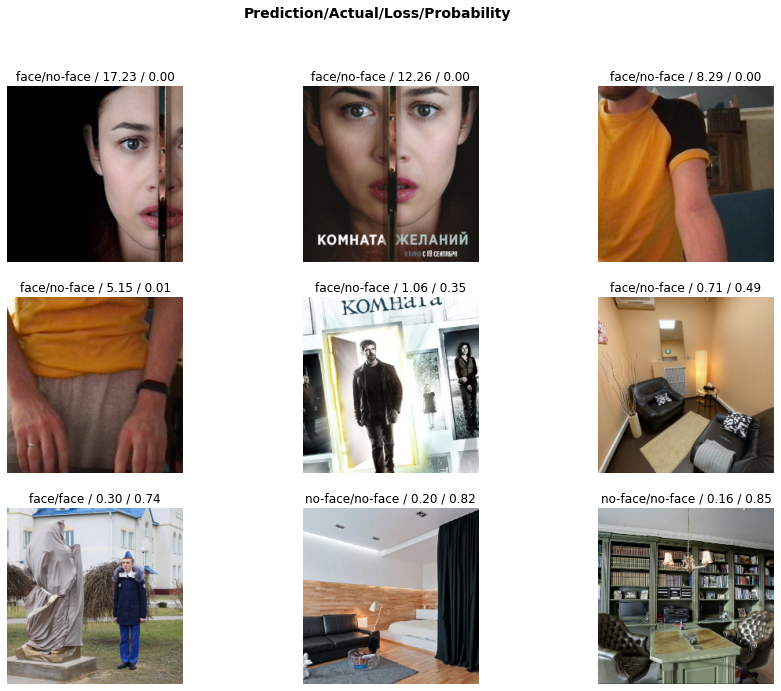

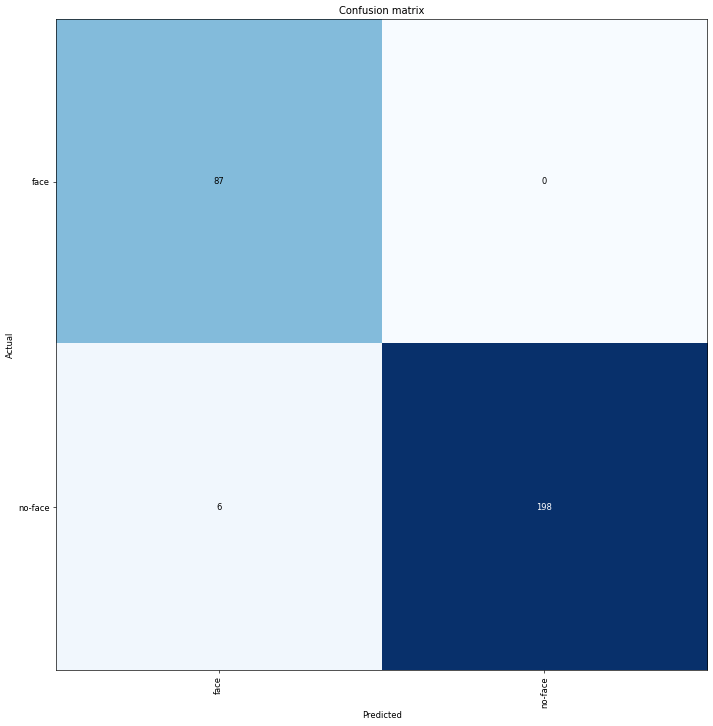

In [9]:
interp = ClassificationInterpretation.from_learner(learn)
losses, idxs = interp.top_losses()
interp.plot_top_losses(9, figsize=(15,11))
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)
#interp.most_confused()

In [10]:
learn.save('model_1')

# Unfreezing, fine-tuning, and learning rates

epoch,train_loss,valid_loss,error_rate,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


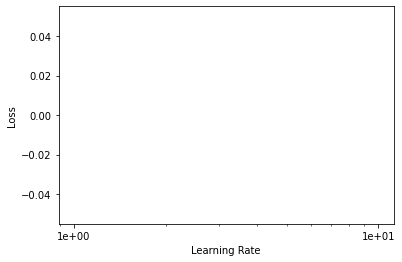

In [11]:
learn.unfreeze()
learn.lr_find()
learn.recorder.plot()

In [41]:
learn.unfreeze()
learn.fit_one_cycle(8, max_lr=slice(1e-5,1e-4))

epoch,train_loss,valid_loss,error_rate,time
0,0.000504,0.622071,0.203704,00:02
1,0.001577,0.705662,0.222222,00:02
2,0.004860,0.674175,0.203704,00:02
3,0.004302,0.780996,0.259259,00:02
4,0.011682,0.607077,0.148148,00:02
5,0.014338,0.586791,0.148148,00:02
6,0.014530,0.567297,0.129630,00:02
7,0.013277,0.559290,0.129630,00:02


In [42]:
learn.save('try-2-stage-2')

/Users/e.gapon/.virtualenvs/pomodoro/lib/python3.9/site-packages/torch/nn/functional.py:3502: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn(
/Users/e.gapon/.virtualenvs/pomodoro/lib/python3.9/site-packages/torch/nn/functional.py:3502: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn(
/Users/e.gapon/.virtualenvs/pomodoro/lib/python3.9/site-packag

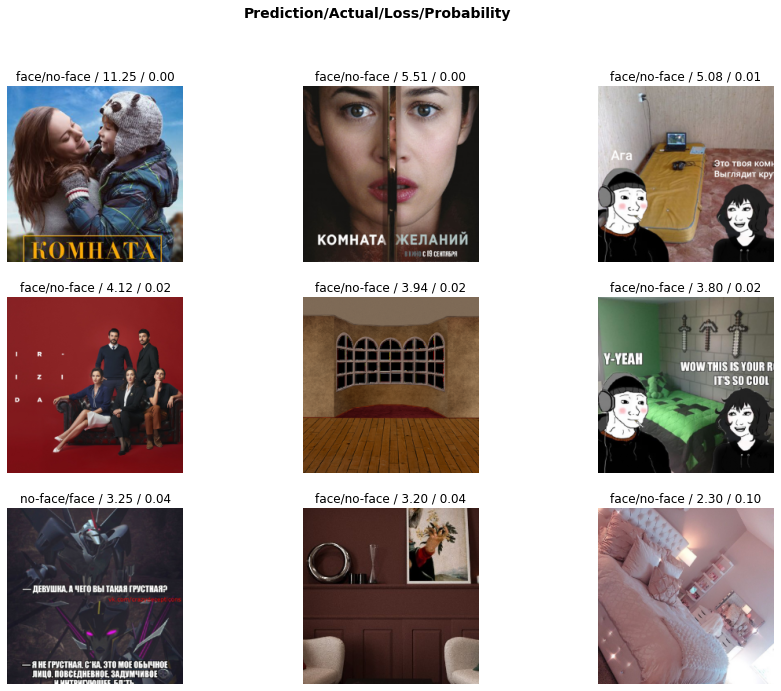

In [12]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_top_losses(9, figsize=(15,11))

# Predict on single image

In [14]:
# img = images.open(images.items[10]).resize(224)
# Можно и так, причем делать resize необязательно
img = open_image('frames/second_frame.jpg').resize(224)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [15]:
pred = learn.predict(img)
pred

(Category tensor(0), tensor(0), tensor([1.0000e+00, 1.5932e-06]))

In [ ]:
pred[0]

Category tensor(0)

In [ ]:
torch.argmax(pred[2])

tensor(0)

In [28]:
learn.export()

In [11]:
%%timeit
img = open_image('frames/second_frame.jpg').resize(224)
pred = learn.predict(img)
pred

158 ms ± 1e+03 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [16]:
learn.export()